# Kapitel 1. Einstieg in die Welt von Python:


In Ihrer Vorbereitung haben Sie bisher die folgenden Konzepte kennengelernt:

* Aufbau eines Jupyter-Notebooks (Aufgabe 1).
* Einfache Rechenoperationen (Aufgabe 2 a.)
* Einfache Zeichenketten (engl. Strings) und formatierte Strings (Aufgabe 2 b.).
* Das Definieren von Funktionen (Aufgabe 3.)
* Das Definieren von Messtabellen.

Hierauf wollen wir an unserem heutigen Versuchstag aufbauen.

## Arbeiten mit Messreihen:

Bisher hat uns das programmieren eher mehr Arbeit gemacht als uns welche abgenommen. Zeitersparnis bekommen wir, wenn wir viele Rechnungen hintereinander ausführen müssen. Hierfür gibt es die **for**-Schleife. Diese Schleife führt die gleichen Zeilen eins Codes wiederholt für die Elemente in einer Liste aus:

In [1]:
liste = [1, 2, 3, 4]

for wert in liste:
    print('Wert:', wert)
    rechnung = wert + 2
print('Ergebnis:', rechnung)

Wert: 1
Wert: 2
Wert: 3
Wert: 4
Ergebnis: 6


Bei einer Schleife ist darauf zu achten, dass der Anweisungsblock, welcher wiederholt ausgeführt werden soll, mit 4x Leerzeichen eingrückt wurde. Dies entspricht einmal die **Tab-Taste**:

<img src="images/Tab-Key.png" alt="Tab-Taste" width="80"/>

In [2]:
liste = [1, 2, 3, 4]
print('Hier läuft das Hauptprogramm')

for wert in liste:
    print('Schleife')
    print('Wert:', wert)
    rechnung = wert + 2
    
print('Hier läuft wieder das Hauptprogramm')
rechnung = rechnung + 5
print('Letztes Ergebnis + 5: ', rechnung)

Hier läuft das Hauptprogramm
Schleife
Wert: 1
Schleife
Wert: 2
Schleife
Wert: 3
Schleife
Wert: 4
Hier läuft wieder das Hauptprogramm
Letztes Ergebnis + 5:  11


Statt das Ergebnis lediglich per `print`-Anweisung darstellen zu lassen, können wir auch unser Wissen um Listen benutzen und die berechneten Werte einer neuen Liste anfügen:

In [3]:
# (Funktion haben wir bereits in der Vorbereitung definiert)
def Spannung(Strom, Widerstand):
    '''
    Diese Funktion berechnet die Spannung eines Ohmschen 
    Widerstands.
    
    Args:
        Strom (float): Der gemessene Strom in mA.
        Widerstand (float): Der Wert des verwendeten Widerstands
            in Ohm.
         
    Returns:
        float: Die berechnete Spannung in V.
    '''
    return Widerstand * Strom/1000

In [4]:
Stromwerte = [101, 105, 98, 87, 112]    # mA
Spannungswerte = [] # Einheit? <-- Deshalb Docstrings und Help!
Widerstand = 100    # Ohm

for Strom in Stromwerte:
    res = Spannung(Strom, Widerstand)
    Spannungswerte.append(res)

Spannungswerte

[10.1, 10.5, 9.8, 8.7, 11.2]

Python ermöglicht uns auch eine kompaktere Schreibweise, die so genannte "list comprehension": 

In [5]:
Spannungswerte = [Spannung(Strom, 100) for Strom in Stromwerte]
Spannungswerte

[10.1, 10.5, 9.8, 8.7, 11.2]

Wir können auch über mehrere Daten gleichzeitig "loopen". Hierzu kann die `zip` Anweisung genutzt werden. `zip` verbindet hierbei die einzelnen Elemente einer Liste wie bei einem Reißverschluss miteinander:

In [6]:
Werte1 = ['A', 'B', 'C', 'D']
Werte2 = [0, 1, 2, 3]

for w1, w2 in zip(Werte1, Werte2):
    print(w1, ' und ', w2)

A  und  0
B  und  1
C  und  2
D  und  3


Dies kann zum Beispiel dann hilfreich sein, wenn sich mehr als eine Variable ändern soll, z.B. bei einer Messreihe für die Schallgeschwindigkeit in Luft:

In [7]:
# Gemessene Werte:
frequenzen = [30.17, 30.63, 30.01, 29.98, 30.12, 29.87, 29.94] #kHz
wellenlängen = [11.12, 11.34, 11.45, 11.25, 11.01, 11.45, 11.23] # mm

# Variante 1:
schallgeschindigkeiten = []  # m/s

for f, l in zip(frequenzen, wellenlängen):
    schallgeschindigkeiten.append(f*l)

print(schallgeschindigkeiten)

# oder Variante 2:
schallgeschindigkeiten2 = [f*l for f,l in zip(frequenzen, wellenlängen)]
print(schallgeschindigkeiten2)

[335.4904, 347.3442, 343.6145, 337.275, 331.6212, 342.0115, 336.2262]
[335.4904, 347.3442, 343.6145, 337.275, 331.6212, 342.0115, 336.2262]


Wir können auch die `zip`-Anweisung mit mehr als nur zwei Listen verwenden:

In [8]:
l1 = ['a', 'b', 'c']
l2 = [1, 2, 3]
l3 = ['x', 'y', 'z']

for i,j,k in zip(l1, l2, l3):
    print(i, 'und', j, 'und', k)

a und 1 und x
b und 2 und y
c und 3 und z


<div class=task>
    
#### Aufgabe 4.b.: Werte berechnen:
Kopieren Sie Ihre Lösung von Aufgabe 4.a. aus der Vorbereitung in das Notebook und berechnen Sie nun für die Messwerte aus Aufgabe 4 a. die Leistung $P$ und den Widerstand $R$ sowie deren Fehler. Nutzen Sie hierfür die ausführliche schrebweise der **for**-Schleife im Fall des Widerstands $R$ und den list-comprehension Syntax für die Leistung $P$. Fügen Sie die berechneten Werte als neue Spalten an die Liste *daten* an. 
<div>

In [9]:
messwert_nummer = list(range(1,7,1))
spannungs_wert = [12., 11.78, 12.56, 12.34, 12.01, 11.94]
strom_werte = [110, 98, 102, 124, 105, 95]
dspannung_wetre = [0.32, 0.15, 0.63, 0.12, 0.20, 0.17]
dstrom_werte = [10]*len(messwert_nummer)
daten = [messwert_nummer, spannungs_wert, strom_werte, dspannung_wetre, dstrom_werte]

def res(i, u):
    r = u/i
    return r

# Widerstand:
widerstand = []
dwiderstand = []

for strom, spannung in zip(daten[2], daten[1]):
    widerstand.append(res(strom, spannung))
daten.append(widerstand)

# Fehler des Widerstands:
for strom, spannung, dstrom, dspannung in zip(daten[2], daten[1], daten[4], daten[3]):
    dwiderstand.append(((dstrom * spannung/(strom)**2)**2 + (dspannung/strom)**2)**0.5)
daten.append(dwiderstand)

# Leistung:
p = [u*i for u,i in zip(daten[1], daten[2])]

# Fehler der Leistung:
dp = [((u*di)**2 + (du*i)**2 )**0.5 for u,i,du,di in zip(daten[1], daten[2], daten[3], daten[4])]
daten.append(p)
daten.append(dp)

for ind, spalte in enumerate(daten): 
    # enumerate ist hilfreich, falls man noch zusätzlich einen Index braucht
    print(f'Spalte mit Index {ind}: ', spalte)

Spalte mit Index 0:  [1, 2, 3, 4, 5, 6]
Spalte mit Index 1:  [12.0, 11.78, 12.56, 12.34, 12.01, 11.94]
Spalte mit Index 2:  [110, 98, 102, 124, 105, 95]
Spalte mit Index 3:  [0.32, 0.15, 0.63, 0.12, 0.2, 0.17]
Spalte mit Index 4:  [10, 10, 10, 10, 10, 10]
Spalte mit Index 5:  [0.10909090909090909, 0.12020408163265306, 0.12313725490196079, 0.09951612903225807, 0.11438095238095237, 0.1256842105263158]
Spalte mit Index 6:  [0.010335218792552269, 0.012360854546774054, 0.01356055790616861, 0.008083630548247704, 0.01105869816696616, 0.013350390150906498]
Spalte mit Index 7:  [1320.0, 1154.4399999999998, 1281.1200000000001, 1530.16, 1261.05, 1134.3]
Spalte mit Index 8:  [125.05614738988244, 118.71364706721802, 141.0840444557782, 124.29390330985667, 121.92214729080192, 120.48727111193115]


## Darstellung von Messdaten mittels `Matplotlib`:
Das Plotten von Daten ist eines der wichtigsten Mittel, um eine Fülle von Informationen kompakt und verständlich seinem Gegenüber darzubieten. Gute Plots zu erstellen kann eine regelrechte Kunst sein und ist für ein gutes Paper, bzw. eine gute Bachelor- bzw. Masterarbeit unverzichtbar.  

<figure class="image">
<img src="images/MaterialPythonkurs092018/Xenon1tResults1yearx1texposure.png"  alt="{{ Xenon1t results 2018 }}" width=50%>
<figcaption>Resultate des XENON1T Dunkle Materie Experiments. Die Graphik wurde mittels Matplotlib in Python erstellt. </figcaption>
</figure>

Jede Programmiersprache verfügt über zusätzliche Pakete (im Englischen "packages"), welche die Funktionalität der verwendeten Programmiersprache erweitern. **Matplotlib** ist ein umfangreiches Package, welches das Zeichnen von 2D und 3D Grafiken ermöglicht. Alle Parameter und Einstellungen einer Grafik werden entsprechend des Python-Codes eingestellt. Dadurch wird das Erstellen der Grafik reproduzierbar und man kann schnell dieselbe Grafik mit neuen Daten füttern.

Es ist unmöglich, alle Möglichkeiten und Einstellungen, die **Matplotlib** bietet, auswendig zu kennen. Mit der Zeit werden Sie ein solides Grundwissen der gängisten Befehle haben. Für alles Weitere hilft die [Matplotlib-Dokumentation mit ihren Beispielen](http://matplotlib.org/). Des Weiteren ist insbesondere hier die **IPython-Hilfe** und die **automatische Vervollständigung von Befehlen** besonders hilfreich.

Für das Praktikum wollen wir uns zunächst lediglich drei unterschiedliche Arten von Plots angucken:

* Normale Liniengrafiken
* Plots mit Fehlerbalken
* Histogramme 

Zunächst müssen wir Python mitteilen, dass wir das **Matplotlib** package nutzen wollen:

In [10]:
import matplotlib.pyplot as plt   

`import` läd für uns aus dem package matplotlib das Modul `pyplot`. Mit Hilfe des Zusatzes `as plt` wird ein "alias" (Abkürzung) erstellt. Dieser Alias erspart uns im Nachfolgenden Arbeit, wie wir im nachfolgenden Beispiel sehen können:

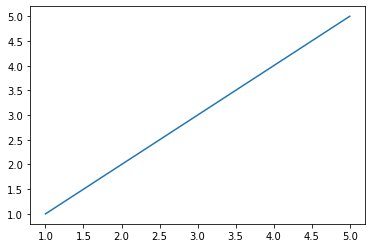

In [11]:
plt.plot([1,2,3,4,5],   # <-- x-Daten
         [1,2,3,4,5]    # <-- y-Daten
        )
plt.show()              # <-- Zeigen des Plots

Hätten wir den Alias nicht definiert, hätten wir den folgenden etwas länglichen Code benötigt, den Sie niemals nutzen sollten:

```python
matplotlib.pyplot.plot([1,2,3,4,5], [1,2,3,4,5])
matplotlib.pyplot.show()
```

Innerhalb der Python-Community haben sich ein paar Standards etabliert, an welche man sich halten sollte. So ist für `matplotlib.pyplot` der Alias `plt` zu verwenden.

Im oberen Beispiel haben Sie nun auch bereits gesehen, wie wir einfache Liniengrafiken erstellen können. Dabei sieht der Plot noch etwas blass aus. Dies können wir mit ein paar zusätzlichen Befehlen und Argumenten ändern.

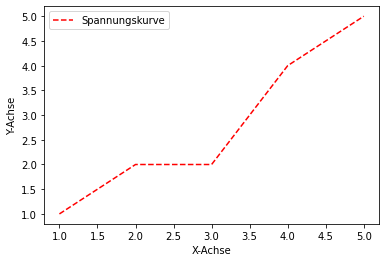

In [12]:
xdaten = [1,2,3,4,5]
ydaten = [1,2,2,4,5]

plt.plot(xdaten, ydaten,         # <-- Wie eben die x und y daten
         color='red',            # <-- Farbe der Linie
         linestyle='dashed',     # <-- Linientyp
         label='Spannungskurve', # <-- Name der Linie
        )
plt.xlabel('X-Achse')           # <-- Beschriftung der x-Achse
plt.ylabel('Y-Achse')           # <-- Beschiftung der y-Achse
plt.legend()                    # <-- Hinzufügen der Legend mit den 
                                #     in plot definierten labels
plt.show()

Viele der eben verwendeten Optionen bieten euch unterschiedliche Auswahlmöglichkeiten:

**Linestyle:**
* `''`:  keine Linie
* `'-'`: durchgehende Linie
* `'--'`: gestrichelte Linie
* `'-.'`: Strich-Punktlinie
* `':'`: Punktlinie

**Color**:
* red, blue, yellow, ...
* RGB Werte von 0 bis 1 (statt von 0 bis 255): (1, 1, 1), (1, 0.2, 0.4)

Darüber hinaus gibt es auch noch andere nützliche Styleoptionen wie `alpha`, was die Transparenz der Linie ändert (Werte zwischen 0-1), oder die `linewidth`-Option, mit dessen Hilfe Sie die Linienbreite ändern können.

Auch die anderen Befehle, welche wir verwendetet haben, verfügen über zusätzliche Optionen:

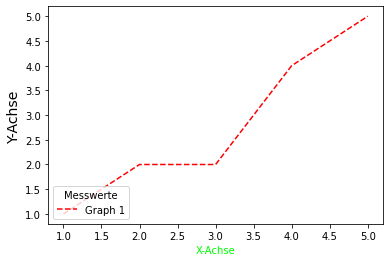

In [13]:
xdaten = [1,2,3,4,5]
ydaten = [1,2,2,4,5]

plt.plot(xdaten, ydaten,       
         color='red',        
         linestyle='dashed',   
         label='Graph 1'       
        )
plt.xlabel('X-Achse',
           color=(0,1,0)     # <-- Beschriftungsfrabe
          )          

plt.ylabel('Y-Achse', 
           fontsize=14)        # <-- Beschiftungsgröße

plt.legend(title='Messwerte',  # <-- Legendentitel
           loc=3)              # <-- Legendenposition: 
                               # 0: Best, 
                               # 1: Oben Rechts 
                               # 2: Oben Links
                               # 3: Unten Links    
plt.show()

Sofern ihr mehrere Graphen in einen Plot zeichnen möchtet geht dies auch ganz einfach.

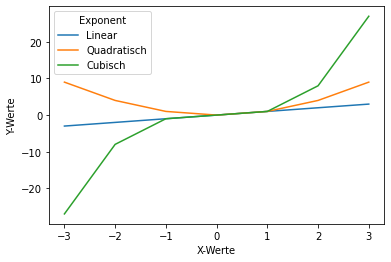

In [14]:
xdaten = [-3, -2, -1, 0, 1, 2, 3]
ydaten1 = xdaten
ydaten2 = [x**2 for x in xdaten]
ydaten3 = [x**3 for x in xdaten]

plt.plot(xdaten, ydaten1, label='Linear')
plt.plot(xdaten, ydaten2, label='Quadratisch')
plt.plot(xdaten, ydaten3, label='Cubisch')

plt.legend(title='Exponent')
plt.xlabel('X-Werte')
plt.ylabel('Y-Werte')
plt.show()

Ihr seht, das `plot` zwischen den angegebene Werte interpoliert. Möchtet ihr eine glatte Kurve zeichnen so müsst ihr die Anzahl an Punkten für die Interpolation erhöhen.

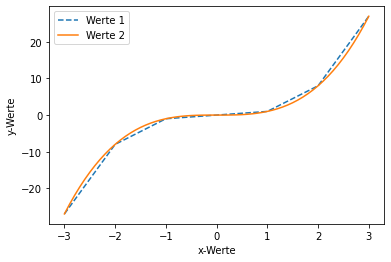

In [15]:
def cubic(x):
    '''
    Eine Funktion, die den cubischen Wert einer Zahl zurück gibt.
    '''
    return x**3


x1 = list(range(-3, 4, 1))              # <- Werte zwischen -3 und 3
x2 = [i/10 for i in range(-30, 31, 1)]  # <- 10 mal mehr Werte

y1 = [cubic(j) for j in x1]
y2 = [cubic(value) for value in x2]


plt.plot(x1, y1, label='Werte 1', linestyle='dashed')
plt.plot(x2, y2, label='Werte 2')

plt.xlabel('x-Werte')
plt.ylabel('y-Werte')
plt.legend()
plt.show()

### Errorbarplot

In der Physik gehören zu jedem gemessen Wert eine Messunsicherheit / ein Messfehler. Diese Fehler sollten natürlich auch in unseren Grafiken korrekt dargestellt werden. Hierfür können wir den `errorbar`-Plot verwenden.

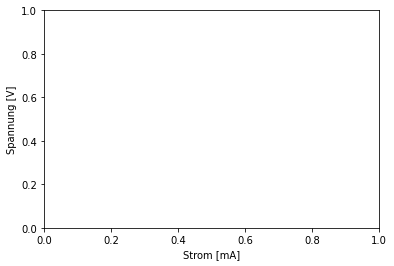

In [16]:
spannung = [0.9, 2.0, 3.0, 4.1, 4.9, 6.2] # [V]
strom = [105, 204, 298, 391, 506, 601]    # [mA]
spannung_error = [0.3]*len(spannung)      # Konstanter Ablesefehler [V]
strom_error = [14, 9, 12, 8, 7, 11]       # gemessener schwankender Fehler[mA]

# plt.errorbar() # <--- Wie verwende ich den errorbar plot?

plt.ylabel('Spannung [V]')
plt.xlabel('Strom [mA]')
plt.show()

<div class=task>
    
#### Aufgabe 5.: Erstellen einer `errorbar`-Plot:

Editieren Sie die obere Zelle so, dass Sie mithilfe des Befehls 

```python
plt.errorbar()
```

einen Errorbarplot erstellen. Verwenden Sie hierfür die IPython-Hilfe-Funktion, um die exakte Syntax zu erfahren. 

**Erinnerung:**
Sie können die IPython-Hilfe aufrufen, indem Sie den Cursor innerhalb des Worts errorbar von plt.errorbar bewegen und die Tastenkombination **Shift + Tab** verwenden. Lesen Sie nun nach, wie Sie die x- und y-Werte und deren Fehler an die Funktion übergeben müssen.

Leider ist diese Standardvariante des Errorbar-Plots noch nicht das, was wir möchten. Die Messwerte sind linear interpoliert und die errorbars sehen noch etwas eigenartig aus. Dies können wir jedoch im Handumdrehen ändern. Kümmern wir uns zunächst um die Plotmarker:

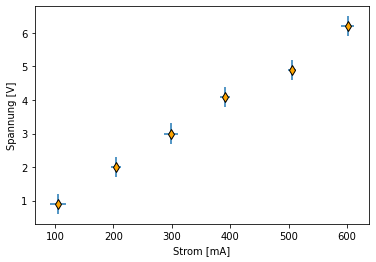

In [17]:
plt.errorbar(strom, spannung,
             xerr=strom_error, 
             yerr=spannung_error,                   
                                       # Änderungen für plotmarker:             | Kurzform:
             linestyle='',             # <-- Schaltet den Linienstyle aus       | ls=''
             marker='d',               # <-- Ändert den Markertyp in Diamanten  | -----
             markerfacecolor='orange', # <-- Ändert die Markerfarbe zu Orange   | mfc='orange'
             markeredgecolor='k',      # <-- Setzt die Kantenfarbe auf schwarz  | mec='k'
             markersize=7              # <-- Ändert die Markergröße             | ms='7'
            )

plt.ylabel('Spannung [V]')
plt.xlabel('Strom [mA]')
plt.show()

All die Optionen, welche wir hier für die Plotmarker verwendet haben, können wir auch in der normalen `plt.plot`-Anweisung verwenden. Dabei gibt es eine ganze Fülle an unterschiedlichen [Marker-Symbole](http://matplotlib.org/api/markers_api.html):
 
* `+`: Plus
* `o`: Kreis
* `*`: Stern
* `,`,`.`: kleiner und sehr kleiner Punkt
* `s`: Quadrat
* `p`: Pentagon
* `h`: Hexagon
* `1`, `2`, `3`, `4`: nach unten, oben, links, rechts zeigendes Dreieck
 
Nach dem wir uns um unsere Marker gekümmert haben, müssen wir nun auch noch unsere Fehlerbalken enstprechend anpassen:

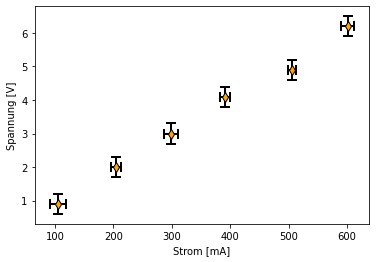

In [18]:
plt.errorbar(strom, 
             spannung,
             xerr=strom_error,
             yerr=spannung_error,     
             ls='',            
             marker='d',              
             mfc='orange', 
             mec='k',      
             ms=7,
                            # Fehlerbalken optionen:
             ecolor='k',    # <-- Ändert die Linienfarbe der errorbars
             elinewidth=2,  # <-- Ändert die Fehlerbalkenbreite
             capsize=5,     # <-- Ändert die Breite der Endkappen der Fehlerbalken
             capthick=2,    # <-- Ändert die Dicke der Endkappen
            ) 

plt.ylabel('Spannung [V]')
plt.xlabel('Strom [mA]')
plt.show()

### Histogramme:

Ein weiterer Plottyp, welcher häufig Verwendung findet, ist das Histogramm. Um unser Histogramm mit Pseudozufallszahlen zu bestücken, müssen wir diese erst erzeugen. Hierfür können wir das `numpy`-Modul verwenden. `numpy` ist ein weiteres Standardmodul, welches viele nützliche Funktionen mit sich bringt. Hier wollen wir uns jedoch nur auf die Erstellung von Zufallszahlen beschränken. 

In [19]:
import numpy as np

`np` ist eine konvetionelle Abkürkung.

In [20]:
rnd_numbers = np.random.normal(0, 1, 1000) # <-- Hier werden 1000 gausförmig verteile Zufallszahlen
                                           # mit einem Mittelwert von 0 und einer Standardabweichung 
                                           # von 1 erzeugt.

Das Histgromm lässt sich ganz einfach mit der `plt.hist`-Anweisung erstellt:

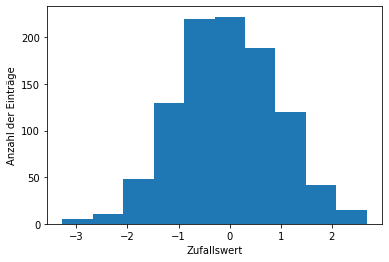

In [21]:
plt.hist(rnd_numbers)

plt.xlabel('Zufallswert')
plt.ylabel('Anzahl der Einträge')
plt.show()

Auch für Histogramme gibt es viele unterschiedliche Optionen, welche Sie entweder mithilfe der Help-Funktion oder anhand der Beispiele in der [Matplolib-Dokumentation](http://matplotlib.org/) herrausfinden können.

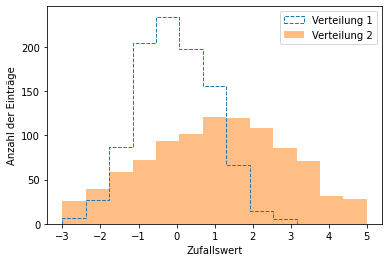

In [22]:
rnd_numbers2 = np.random.normal(1, 2, 1000)


plt.hist(rnd_numbers, 
         bins=13, 
         range=(-3,5),         # <-- Achtung: Im Gegensatz zur range-Anweisung ist 
                               # das Intervall hier geschlossen [-3, 5]
         histtype='step',      # Ändert den Balkentyp in Stufen
         linestyle='dashed',
         label='Verteilung 1'
        )

plt.hist(rnd_numbers2, 
         bins=13,
         range=(-3,5),
         alpha=0.5,            # Ändert die Transparenz der Balken 
         label='Verteilung 2'
        )

plt.legend()
plt.xlabel('Zufallswert')
plt.ylabel('Anzahl der Einträge')
plt.show()

Bei Histogrammen sollten Sie immer darauf achten, dass das "binning" sinnvoll gewählt ist. Weder zu viele noch zu wenige Bins führen zu einer sinnvollen Darstellung Ihrer Daten.

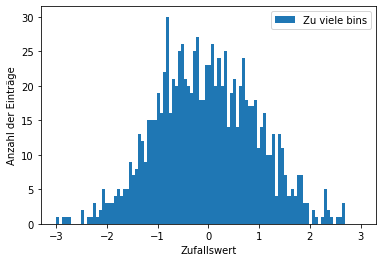

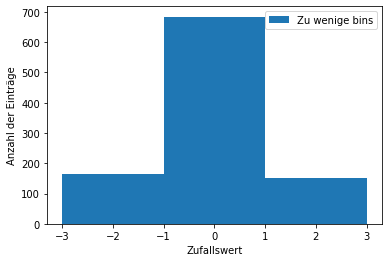

In [23]:
plt.hist(rnd_numbers, 
         bins=100, 
         range=(-3,3),
         label='Zu viele bins'
        )

plt.legend()
plt.xlabel('Zufallswert')
plt.ylabel('Anzahl der Einträge')
plt.show()

plt.hist(rnd_numbers, 
         bins=3, 
         range=(-3,3),
         label='Zu wenige bins'
        )

plt.legend()
plt.xlabel('Zufallswert')
plt.ylabel('Anzahl der Einträge')
plt.show()

Nach dem wir jetzt die verschiedenen Plottypen mit ihren unterschiedlichen Optionen kennengelernt haben, möchten wir diese natürlich auch speichern können. Dies können wir auf zwei unterschiedliche Arten machen.

Entweder Sie machen mit Ihrer Maus einen Rechtsklick auf die Grafik und wählen "Grafik speichern als" aus, oder Sie verwenden statt der `plt.show`- die `plt.savefig`-Anweisung dafür, wobei Letzteres empfohlen ist.

<div class=task>
    
#### Aufgabe 6.: Erstellen einer gauss'schen Wahrscheinlichkeitsdichte:

Im folgenden wollen wir ein Plot mit einer gauss'schen Wahrscheinlichkeitsdichte erstellen. Gehen Sie hierfür wie folgt vor:

1. Erstellen Sie 500000 pseudo-Zufallszahlen, welche einer Gaußverteilung mit $µ=5$ und $sigma=2$ folgen.
2. Tragen Sie die Zufallszahlen in ein Histogramm ein und normieren Sie dieses, sodass die Gesamtfläche 1 beträgt. **Tipp: `plt.hist` hat hierfür einen optionalen Parameter. Benutzen Sie die Help oder das Internet, um herrauszufinden, welcher es ist.**
3. Wählen Sie eine geeignete `range` und ein `binning` von 100 für das Histogram.
4. Plotten Sie anschließend die dazugehörige Gaußverteilung als Funktion. Gehen Sie dabei wie folgt vor:
    1. Erstellen Sie eine Gaußfunktion. *Erinnerung:* eine Gaußverteilung ist gegeben durch:
    $$g(x, \mu, \sigma) = \frac{1}{\sqrt{2 \pi} \, \sigma} \exp\bigg( \frac{ -(x - \mu)^2}{2 \sigma^2}\bigg) $$
    **Tipp:** Das Numpy-Paket beinhaltet die Zahlen $\pi$ und die Exponentialfunktion. Sie können diese über `np.pi` und `np.exp()` verwenden. 
    2. Erstellen Sie eine Liste von x-Werten in der von Ihnen gewählten range in 0.1er Schritten. Verwenden Sie hierfür die `range`-Funktion zusammen mit der list-comprehension.
    3. Erstellen Sie den plot.
Das Ergebnis sollte wie folgt aussehen:

<figure class="image">
<img src="images/MaterialPythonkurs092018/Gaußverteilung.png"  alt="{{ Gaussverteilung }}" width=70%>
</figure>

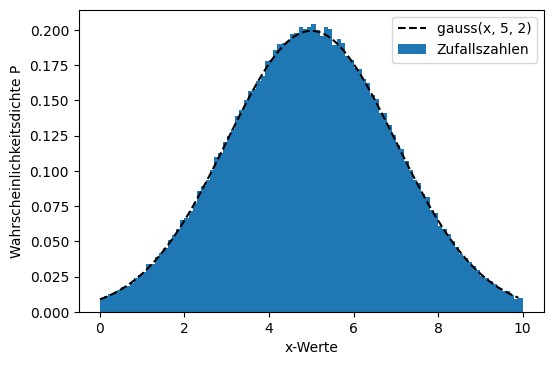

In [24]:
import numpy as np
import matplotlib.pyplot as plt
rnd = np.random.normal(5, 2, 500000)

# Histogram:
plt.figure(dpi=100)
plt.hist(rnd, bins=100, range=(0, 10), density=True, label='Zufallszahlen')

# Gaussfunktion:
def gauss(x, mu, sig):
    return 1/((2 * np.pi)**0.5 * sig) * np.exp(-(x - mu)**2/(2*sig**2))

# x-Werte mittels listcomprehension:
xdata = [i/10 for i in range(0, 100, 1)]

# Plot:
plt.plot(xdata, [gauss(x, 5, 2) for x in xdata], ls='dashed', color='k', label='gauss(x, 5, 2)')
plt.legend()
plt.ylabel('Wahrscheinlichkeitsdichte P')
plt.xlabel('x-Werte')
plt.show()

## Fitten von Messdaten:

### Methode der kleinsten Quadrate

Die Herleitung dieser Methode befindet sich im separaten Notebook `Herleitung_Methode_der_kleinsten_Quadarate.ipynb`.

Diese Methode ist in der Funktion `curve_fit` implementiert.

In [25]:
from scipy.optimize import curve_fit

Gucken wir uns einen Fit ohne Messfehler an um die Funktion etwas näher kennenzulernen.

In [26]:
# Und jetzt fitten wir:
para, pcov = curve_fit(Spannung,   # <-- Funktion, die an die Messdaten gefittet werden soll
                       strom,      # <-- gemessenen "X"-Werte
                       spannung    # <-- gemessenen "Y"-Werte 
                      )

print(para[0])
print(pcov[0,0]**0.5)

print(f'Widerstand R {para[0]:.2f} +/- {pcov[0,0]**0.5:.2f} Ohm')

10.098259801145538
0.15780378609977405
Widerstand R 10.10 +/- 0.16 Ohm


Sie sehen `curve_fit` gibt uns zwei unterschiedliche Listen zurück. Die erste Liste `para` beinhaltet die berechneten Fitparameter. `pcov` hingegen ist eine [Kovarianzmatrix](https://de.wikipedia.org/wiki/Kovarianzmatrix) auf deren Diagonalen Sie die Varianzen ($\sigma^2$) der einzelnen Parameter finden (auf der Nebendiagonalen befinden sich die Kovarianzen). D.h. bei einer Funktion mit drei Parametern `def f(x, p1, p2, p3):` würde `para` und `pcov` allgemein so aussehen:

```
para = [p1, p2, p3]
pcov = [[cov_1,1, cov_1,2, cov_1,3], 
        [cov_2,1, cov_2,2, cov_2,3],
        [cov_3,1, cov_3,2, cov_3,3]]
```
wobei `cov_i,i` wie bereits erwähnt die einzelnen Kovarianzen bzw. Varianzen sind. Aber was genau macht jetzt curve_fit eigentlich, um auf diese Werte zu kommen? Wie bereits erklärt, basiert `curve_fit` auf der Methode der kleinsten Quadrate. D.h. die Funktion probiert etliche verschiedene Varianten Ihrer Parameter durch, bis es die Kombination gefunden hat, bei der das $\chi^2$ klein wird. Gucken wir uns mal ein paar Zwischenschritte für unser Beispiel des ohm'schen Widerstandes an: 

<figure class="image">
<img src="images/MaterialPythonkurs092018/Fitting_gif.gif"  alt="{{ Least Square Beispiel }}" width=100%>
</figure>

Nach dem wir nun wissen, was genau `curve_fit` macht, wollen wir unser Resultat etwas schöner darstellen:

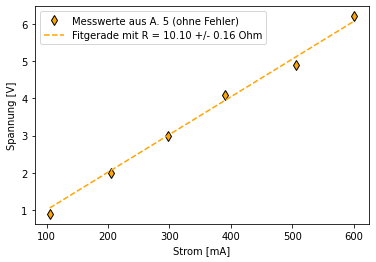

In [27]:
plt.plot(strom, 
         spannung,    
         ls='',            
         marker='d',              
         mfc='orange', 
         mec='k',      
         ms=7,
         label='Messwerte aus A. 5 (ohne Fehler)'
        ) 
plt.plot(strom, 
         [Spannung(value, para[0]) for value in strom], 
         ls ='dashed',
         color='orange',
         label = f'Fitgerade mit R = {para[0]:0.2f} +/- {pcov[0,0]**(1/2):0.2f} Ohm'
        )

plt.legend()
plt.ylabel('Spannung [V]')
plt.xlabel('Strom [mA]')
plt.show()

Das Ergebnis sieht bereits ganz gut aus, allerdings kennt hier unsere Funktion `curve_fit` die Fehler unserer Messwerte noch gar nicht. Da dies sehr unphysikalisch ist, wiederholen wir das Ganze nochmal mit Unsicherheiten:

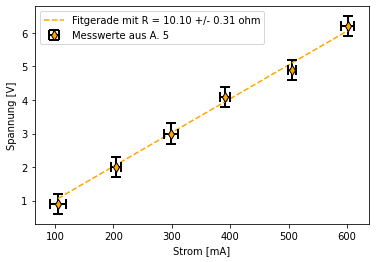

In [28]:
para2, pcov2 = curve_fit(Spannung,   
                         strom,      
                         spannung,
                         sigma=spannung_error, # <-- Diesesmal mit Fehler
                         absolute_sigma=True   # <-- Diese Option müssen wir auf True (wahr) setzen, da 
                                               # wir in der Regel absolute und keine relativen 
                                               # Unsicherheiten messen.
                        )

plt.plot(strom,
         [Spannung(value, para2[0]) for value in strom], 
         ls ='dashed',
         color='orange',
         label = f'Fitgerade mit R = {para2[0]:0.2f} +/- {pcov2[0,0]**(1/2):0.2f} ohm'
        )

plt.errorbar(strom, 
             spannung,
             xerr=strom_error,
             yerr=spannung_error,     
             ls='',            
             marker='d',              
             mfc='orange', 
             mec='k',      
             ms=7,
             ecolor='k',    
             elinewidth=2,  
             capsize=5,     
             capthick=2,     
             label='Messwerte aus A. 5'
            ) 


plt.legend()
plt.ylabel('Spannung [V]')
plt.xlabel('Strom [mA]')
plt.show()

Wie Sie sehen können, ist der Wert für den Widerstand zwar gleich geblieben, jedoch die Unsicherheit des Wertes hat sich erhöht.

Wie gut fittet unsere obige Funktion unsere Messdaten? Sehr gut? Gut? Befriedigend? Oder doch eher schlecht?   Wäre es nicht gut, ein Maß für die Güte des Fits zu haben? Wie könnte ein solches Maß aussehen?

Sie haben das entscheidende Kriterium bereits kennengelernt, bei der Methode der kleinsten Quadrate geht es darum, das  $\chi^2$ zu minimieren. Gucken wir uns hierzu erst noch einmal an, wie sich das $\chi^2$ berechnet:

$$ \chi(\phi_1 ... \phi_N)^2 = \sum_{i = 1}^{N} \frac{ (y_i - \lambda(x_i; \phi))^2}{\Delta y_i^2}$$

Dies bedeute in unserem Fall:

$$ \chi(R)^2 = \sum_{i = 1}^{N} \frac{ (U_i - u(I_i; R))^2}{\Delta U_i^2}$$

wobei hier groß $U$ unsere gemessene Spannung und klein $u$ unsere Funktion entspricht.

In [29]:
chi_2 = [ (u - Spannung(i, para2[0]))**2/du**2 for i,u,du in zip(strom, spannung, spannung_error)]
chi_2 = sum(chi_2)
print(f'Das chi-qudrat ist {chi_2:.2f}')

Das chi-qudrat ist 1.26


Wie vergleicht sich dieses $\chi^2$ nun mit einer Funktion, welche unsere Daten schlechter beschreibt? Zum Beispiel sofern wir die Spannung über die Funktion

$$ U(R,I) = R \cdot I $$

$$ U(R,I) = R \cdot I^2 $$

beschreiben würden.

In [30]:
def Spannung2(I, R):
    return R * I**2

para3, pcov3 = curve_fit(Spannung2,   
                         strom,      
                         spannung,
                         sigma=spannung_error,
                         absolute_sigma=True     
                        )

chi_2_new = [(u - Spannung2(I, *para3))**2/du**2 for I,u,du in zip(strom, spannung, spannung_error)]
chi_2_new = sum(chi_2_new)
print(f'Chi-qudrat nach URI: {chi_2:.2f}\nChi-qudrat nach URI-Parabel: {chi_2_new:.2f}')

Chi-qudrat nach URI: 1.26
Chi-qudrat nach URI-Parabel: 60.68


Wie Sie sehen können, ist das $\chi^2$ für unsere zweite Funktion etwas größer als für das klassische ohm'sche Gesetzt. Somit würden wir unseren zweiten Ansatz verwerfen.

Damit man für einen gegebenen Datensatz nicht hunderte von verschiedenen Funktionen durchprobieren muss, gibt es für das $\chi^2$ eine allgemeine Faustregel, welche den berechneten $\chi^2$-Wert mit der Anzahl unserer Freiheitsgrade vergleicht. Die Anzahl an Freiheitsgrade ist allgemeinhin gegeben als *Anzahl der Messwerte - Anzahl der Funktionsparameter* ($m - n$).

1. Sofern  $\chi^2/\text{ndof} >> 1$: sollte die Hypothese bzw. die Fitfunktion angezweifelt werden. Sie beschreibt in diesem Fall die Messdaten nur unzureichend. (Bzw. sollte $\chi^2/\text{ndof} > 1$ kann dies auch bedeuten, dass die Unsicherheiten unterschätzt sind)
2. Sofern $\chi^2/\text{ndof} \approx 1$: beschreibt die Hypothese bzw. die Fitfunktion die Daten wie erwartet und wird nicht abgelehnt. 
3. Falls $\chi^2/\text{ndof} << 1$ beschreibt die Hypothese bzw. die Fitfunktion die Daten wesentlich besser als erwartet. In diesem Fall heißt es nicht, dass unsere Hypothese falsch ist, aber man sollte überprüfen, ob die gemessenen Fehler nicht überschätzt worden sind (oder eine Korrelation zwischen den Messfehlern vorliegt).  

Sofern Sie eine Arbeit schreiben und Ihre **Goodness-of-the-Fit** ($\chi^2/\text{ndof}$) angeben wollen, so geben Sie immer beides an, das $\chi^2$ und die Anzahl an Freiheitsgraden ndof. Beide Werte getrennt haben einen größeren Informationsgehalt als der resultierende Quotient (Genaueres lernen Sie z.B. in der Vorlesung *Statistik, Datenanalyse und Simulationen* im Master).

<div class=task>
    
#### Aufgabe 7.: PGP Auswertung:

Jetzt sind Sie ein letztes mal gefordert. In dieser Aufgabe wollen wir alles, was wir heute gelernt haben, nochmal reflektieren und anwenden. Erstellen Sie hierfür ein neues Jupyter-Notebook und bearbeiten Sie die Aufgaben im Skript. Sofern Sie Fragen bzw. Probleme haben, vergessen Sie nicht auf die folgenden Hilfsmöglichkeiten zurückzugreifen:

1. Verwendung der IPython-Hilfe unter Verwendung der **Shift + Tab** Tasten.
2. Die ausführliche Dokumentation von Python und das Angebot etlicher nützlicher Hilfsbeiträge in verschiedenen Foren (z.B. stackoverflow) im Internet.
3. Fragen Sie beim Assistenten nach: **`mobitar@students.uni-mainz.de`**